In [1]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding="latin1")


In [2]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
df.isna().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [6]:
X = df[["SALES","QUANTITYORDERED","PRICEEACH"]]

In [7]:
X.isna().sum()

SALES              0
QUANTITYORDERED    0
PRICEEACH          0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

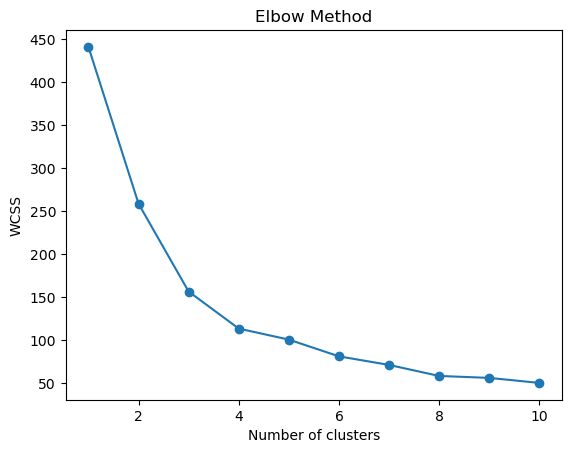

In [11]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df["Cluster"] = y_kmeans

In [13]:
print(df.groupby("Cluster")[["SALES", "QUANTITYORDERED", "PRICEEACH"]].mean())


               SALES  QUANTITYORDERED  PRICEEACH
Cluster                                         
0        1958.255625        38.500000  51.651875
1        6028.423448        44.275862  99.520345
2        1537.722083        24.541667  62.362083
3        3168.645000        46.250000  68.741875
4        3432.298387        28.500000  97.730645


In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title("K-Means Clustering on Sales Data")
plt.xlabel("Scaled Sales")
plt.ylabel("Scaled Quantity Ordered")
plt.show()


NameError: name 'X_scaled' is not defined

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title("K-Means Clustering on Sales Data")
plt.xlabel("Scaled Sales")
plt.ylabel("Scaled Quantity Ordered")
plt.show()
